In [1]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                      shear_range=0.2, 
                                        zoom_range=0.2,
                                        horizontal_flip=True)
x_train = train_datagen.flow_from_directory(
        'dataset/train',
        target_size = (32,32),
        # color_mode="grayscale",
        batch_size=4,
        class_mode='binary'
        )

Found 60 images belonging to 2 classes.


In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)
x_test = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(32,32),
        batch_size=4,
        # color_mode="grayscale",
        class_mode='binary')

Found 60 images belonging to 2 classes.


In [5]:
vgg = tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1,
    classifier_activation="softmax",
)

94781440/94765736 [==============================] - 10s 0us/step


In [6]:
for layer in vgg.layers:
  layer.trainable = False

In [7]:
x = tf.keras.layers.GlobalMaxPooling2D()(vgg.output)
prediction = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# # create a model object
model = tf.keras.models.Model(inputs=vgg.input, outputs=prediction)

# # view the structure of the model
model.summary()

# # tell the model what cost and optimization method to use
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                           

In [8]:
history = model.fit(
  x_train,
  validation_data=x_test,
  epochs=35,
)

Epoch 1/35
15/15 [==============================] - 11s 163ms/step - loss: 0.8587 - accuracy: 0.4833 - val_loss: 0.8459 - val_accuracy: 0.5000
Epoch 2/35
15/15 [==============================] - 1s 67ms/step - loss: 0.8146 - accuracy: 0.4333 - val_loss: 0.7126 - val_accuracy: 0.4500
Epoch 3/35
15/15 [==============================] - 1s 66ms/step - loss: 0.7477 - accuracy: 0.5333 - val_loss: 0.7078 - val_accuracy: 0.5333
Epoch 4/35
15/15 [==============================] - 1s 78ms/step - loss: 0.7197 - accuracy: 0.5000 - val_loss: 0.7195 - val_accuracy: 0.4833
Epoch 5/35
15/15 [==============================] - 1s 73ms/step - loss: 0.6905 - accuracy: 0.5333 - val_loss: 0.7604 - val_accuracy: 0.5000
Epoch 6/35
15/15 [==============================] - 1s 78ms/step - loss: 0.7048 - accuracy: 0.5000 - val_loss: 0.7097 - val_accuracy: 0.4000
Epoch 7/35
15/15 [==============================] - 1s 73ms/step - loss: 0.7301 - accuracy: 0.4167 - val_loss: 0.7330 - val_accuracy: 0.5000
Epoch 8/35


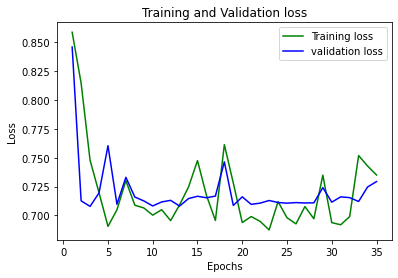

In [9]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,36)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

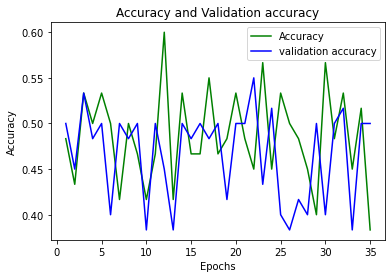

In [10]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,36)
plt.plot(epochs, loss_train, 'g', label='Accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Accuracy and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()